In [1]:
%matplotlib inline

import pandas as pd
#import pandas.DataFrame as df
import matplotlib.pyplot as plt
from datetime import datetime as dt

from onc.onc import ONC
onc = ONC('533c0804-3482-4efb-813b-681d357440d6')


#Baynes location codes
#BSM.J1 	5mbss 
#BSM.J2 	20mbss 
#BSM.J3 	40mbss 

filters = {
    'locationCode': 'BSM.J2',
    'deviceCategoryCode': 'CTD',
    'qualityControl': 'raw',
    'sensorCategoryCodes': 'conductivity,temperature',
    'dateFrom':'2020-06-181T20:00:00.000Z',
    'dateTo':'2020-06-18T23:00:00.999Z'
}
result = onc.getDirectByLocation(filters) # need to loop here to get > 100000 rows




Error 400 - Bad Request: https://data.oceannetworks.ca/api/scalardata?locationCode=BSM.J2&deviceCategoryCode=CTD&qualityControl=raw&sensorCategoryCodes=conductivity%2Ctemperature&dateFrom=2020-06-181T20%3A00%3A00.000Z&dateTo=2020-06-18T23%3A00%3A00.999Z&method=getByLocation&token=533c0804-3482-4efb-813b-681d357440d6
   Error 127: Invalid parameter value (parameter: dateFrom)


Exception: ('The request failed with HTTP status 400.', {'errors': [{'errorCode': 127, 'errorMessage': 'Invalid parameter value', 'parameter': 'dateFrom'}]})

In [6]:
d = {'Conductivity (S/m)':[],'Temperature (C)':[]}

d['Conductivity (S/m)'] = result['sensorData'][0]['data']['values']
d['Temperature (C)'] = result['sensorData'][1]['data']['values']
df = pd.DataFrame.from_dict(d)
df

NameError: name 'result' is not defined

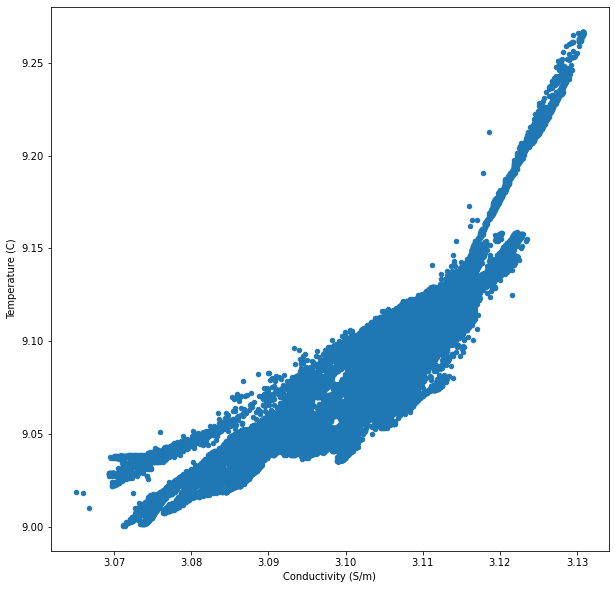

In [4]:
fig = df.plot.scatter(x='Conductivity (S/m)',y='Temperature (C)',figsize=(10,10))